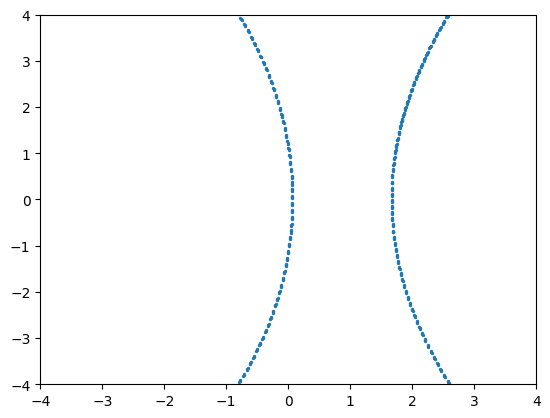

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/home/di_wen/work/rust_projects/chaos/data/poincare.csv')
theta = df['theta']
omega = df['omega']
plt.scatter(theta,omega,s=2)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

前10个庞加莱截面点 (θ, ω):
19.9703, 1.6564
26.2640, 1.3208
30.7472, 2.1912
39.1049, 1.1961
45.2598, 1.0238
42.0160, 1.5795
40.6495, 0.5687
43.2265, 2.1487
51.2186, 1.7974
57.6796, 1.3260


/tmp/ipykernel_19843/1701839178.py:61: UserWarning: Glyph 24359 (\N{CJK UNIFIED IDEOGRAPH-5F27}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_19843/1701839178.py:61: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_19843/1701839178.py:61: UserWarning: Glyph 39537 (\N{CJK UNIFIED IDEOGRAPH-9A71}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_19843/1701839178.py:61: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_19843/1701839178.py:61: UserWarning: Glyph 38459 (\N{CJK UNIFIED IDEOGRAPH-963B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_19843/1701839178.py:61: UserWarning: Glyph 23612 (\N{CJK UNIFIED IDEOGRAPH-5C3C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_19843/1701839178.py:61: UserWarning: Glyph 38750 (\N{CJK UNIFIED IDEOGRAP

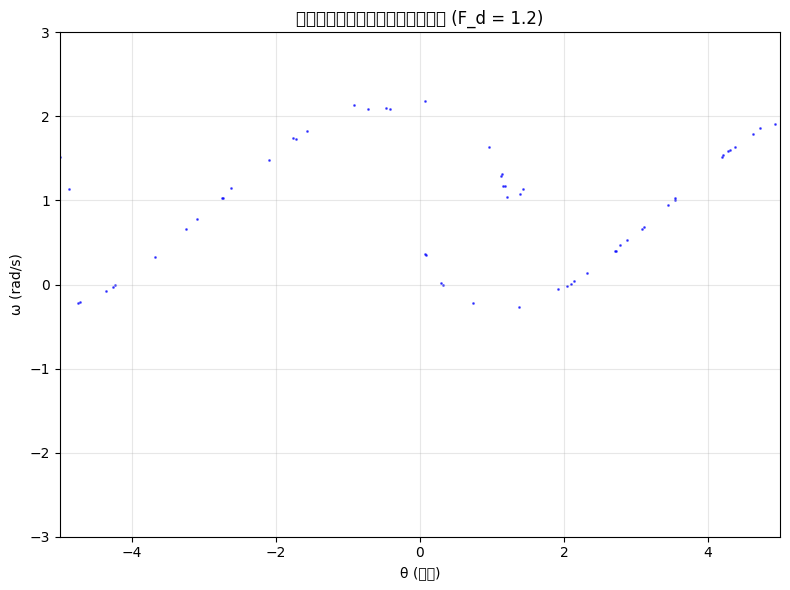

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 参数设置（基于查询条件）
g = 9.8          # 重力加速度 (m/s²)
l = 9.8          # 摆长 (m)
q = 0.5          # 阻尼系数
F_d = 1.2        # 驱动幅度
omega_d = 2.0 / 3.0  # 驱动频率 (rad/s)
dt = 0.04        # 时间步长 (s)
T = 2 * np.pi / omega_d  # 驱动周期 ≈ 9.425 s

# 初始条件
theta0 = 0.2     # 初始角度 (rad)
omega0 = 0.0     # 初始角速度 (rad/s)
y0 = [theta0, omega0]

# 模拟时间：瞬态期 + 采样期
num_transient = 50  # 瞬态周期数（进入吸引子）
num_sample = 1000   # 采样周期数（庞加莱截面点数）
t_transient = np.arange(0, num_transient * T, dt)
t_total = np.arange(0, (num_transient + num_sample) * T, dt)

# 微分方程右端函数 (RHS)
def rhs(y, t):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / l) * np.sin(theta) - q * omega + F_d * np.cos(omega_d * t)  # 驱动用 cos（标准相位）
    return [dtheta_dt, domega_dt]

# 数值积分（使用 odeint）
sol = odeint(rhs, y0, t_total)

# 提取轨迹
theta = sol[:, 0]
omega = sol[:, 1]
t = t_total

# 庞加莱截面采样：瞬态后，在 t mod T ≈ 0 时采样
poincare_idx = np.where(np.mod(t, T) < dt)[0]  # 近似 t % T == 0
poincare_idx = poincare_idx[poincare_idx >= len(t_transient)]  # 仅采样期

theta_p = theta[poincare_idx]
omega_p = omega[poincare_idx]

# 输出前10个采样点（验证用）
print(" (θ, ω):")
for i in range(min(10, len(theta_p))):
    print(f"{theta_p[i]:.4f}, {omega_p[i]:.4f}")

# 绘制庞加莱截面
plt.figure(figsize=(8, 6))
plt.scatter(theta_p, omega_p, s=1, alpha=0.6, color='blue')
plt.xlabel('θ (rad)')
plt.ylabel('ω (rad/s)')
plt.title('Poincaré section(F_d = 1.2)')
plt.grid(True, alpha=0.3)
plt.xlim(-5, 5)  # 可调整范围以聚焦吸引子
plt.ylim(-3, 3)
plt.tight_layout()
plt.show()  # 显示图表；或 plt.savefig('poincare.png') 保存文件

# 解释：此代码模拟系统进入奇怪吸引子后，生成约1000个点。增加 num_sample 可获得更密集的分形结构。
# 注意：θ 值可能超过 ±π（表示多绕摆），这是物理真实的；若需 unwrap，可添加逻辑。